In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# ! pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## ws_10_1
### 부트스트랩 방식으로 표본 평균 분포를 시각화

In [ ]:
"""
1. 데이터셋 다운 받기
    - http://data.seoul.go.kr/dataList/229/S/2/datasetView.do 접속
    - 파일 형태 : CSV
    - 시점 정렬 : 오름차순
    - 소수점 조회화면과 동일
"""

In [4]:
import pandas as pd

# 파일 경로 설정
file_path = "data/data_ws4_1.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)  # [빈칸] CSV 파일을 불러오는 코드 작성
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별(1)  56 non-null     object
 1   구분별(2)  56 non-null     object
 2   2023    56 non-null     object
 3   2023.1  56 non-null     object
 4   2023.2  56 non-null     object
 5   2023.3  56 non-null     object
 6   2023.4  56 non-null     object
 7   2023.5  56 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB
None


,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,구분별(1),구분별(2),30분 미만 (%),30분-1시간 미만 (%),1시간-1시간 30분 미만 (%),1시간 30분-2시간 미만 (%),2시간 이상 (%),평균소요시간 (분)
1,서울시,소계,37.2,47.2,14.2,1.2,0.2,34.51
2,성별,남성,31.8,50.2,16.5,1.2,0.2,36.49
3,성별,여성,44.4,43.2,11.0,1.1,0.2,31.87
4,연령별,10대,76.3,16.5,6.6,0.6,-,23.02


In [6]:
# 컬럼명 앞뒤 공백 제거
df.columns = df.columns.str.strip()  # [빈칸] 컬럼명 공백 제거 코드 작성

# 특정 컬럼명을 '평균소요시간'으로 변경
df = df.rename(columns={'2023.5': '평균소요시간'})  # [빈칸] 컬럼명을 변경하는 코드 작성

# 첫 번째 행 제거 (불필요한 데이터 제거)
df = df.iloc[1:].reset_index(drop=True)  # [빈칸] 첫 번째 행을 제거하는 코드 작성

# 문자열을 숫자로 변환, 변환 실패 시 NaN으로 처리
df['평균소요시간'] = pd.to_numeric(df['평균소요시간'], errors='coerce')  # [빈칸] 문자열을 숫자로 변환하는 코드 작성

# NaN 값 제거
df = df.dropna(subset=['평균소요시간'])  # [빈칸] NaN 값을 제거하는 코드 작성
df.head()


,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,평균소요시간
0,성별,남성,31.8,50.2,16.5,1.2,0.2,36.49
1,성별,여성,44.4,43.2,11.0,1.1,0.2,31.87
2,연령별,10대,76.3,16.5,6.6,0.6,-,23.02
3,연령별,20대,26.3,47.7,23.5,1.9,0.5,40.66
4,연령별,30대,29.3,52.8,16.4,1.4,0.1,36.86


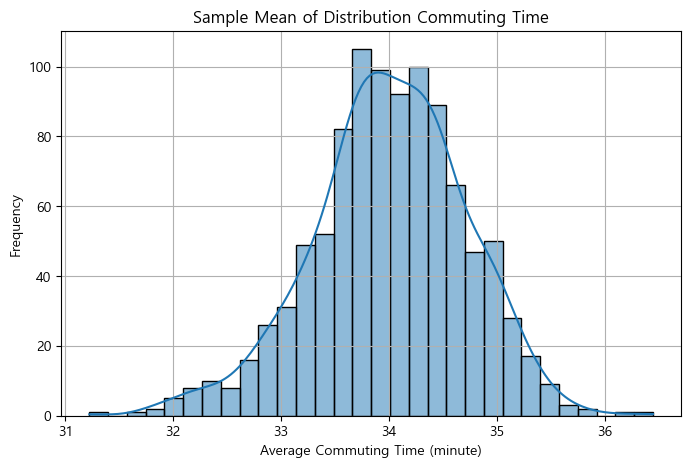

In [12]:
import numpy as np

# 평균과 표준편차 계산
mu = df['평균소요시간'].mean()  # [빈칸] 평균 계산 코드 작성
sigma = df['평균소요시간'].std()  # [빈칸] 표준편차 계산 코드 작성

# 표본 크기 및 반복 횟수 설정
sample_size = 30
num_samples = 1000

# 표본 평균값을 저장할 리스트 생성
# sample_size는 하나의 요소가 만들어지기 위해 사용할 데이터의 개수
# num_samples는 요소의 개수
# 즉, sample_means는 1000개의 요소를 가진 리스트
sample_means = [
    np.mean(np.random.choice(df['평균소요시간'], size=sample_size, replace=True))  # [빈칸] 표본 평균 계산 코드 작성
    for _ in range(num_samples)
]


import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(8, 5))

# 히스토그램 및 KDE 곡선 시각화
sns.histplot(sample_means, bins=30, kde=True, edgecolor='black')  # [빈칸] 히스토그램을 그리는 코드 작성

# 그래프 제목 및 축 레이블 설정
plt.title('Sample Mean of Distribution Commuting Time')
plt.xlabel('Average Commuting Time (minute)')
plt.ylabel('Frequency')

# 격자 추가
plt.grid(True)

# 그래프 출력
plt.show()

## ws_10_2
### 이항분포와 정규분포 근사를 시각화하고 비교

In [17]:
import pandas as pd
import numpy as np
# 실험 설정
# 차량이 신호에 멈추지 않고 지나갈 확률
# 하루 동안의 차량 수
# 실험 반복 횟수

# 언제 데이터프레임이 유리할까?
# - 여러 열을 함께 비교 시각화하고 싶을 때
# - 데이터 전처리나 연산 시 열이름을 계속 유지하면서 작업하고 싶을 때

# 언제 시리즈가 더 낫나?
# - 시각화, 수치 연산, 통계 함수 사용 시

# 이항분포 데이터 불러오기
df = pd.read_csv('data/data_ws4_2.csv')
binomial_samples = df['binomial_samples']
binomial_samples

0       8
1      14
2      15
3      19
4      19
       ..
995    12
996    12
997    12
998    12
999    14
Name: binomial_samples, Length: 1000, dtype: int64

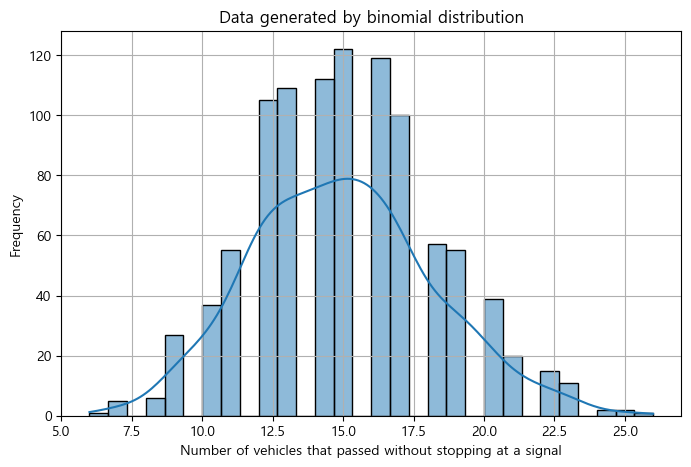

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(binomial_samples, bins=30, kde=True, edgecolor='black')  # [빈칸] 이항분포 히스토그램 시각화 코드 작성
plt.title('Data generated by binomial distribution')
plt.xlabel('Number of vehicles that passed without stopping at a signal')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

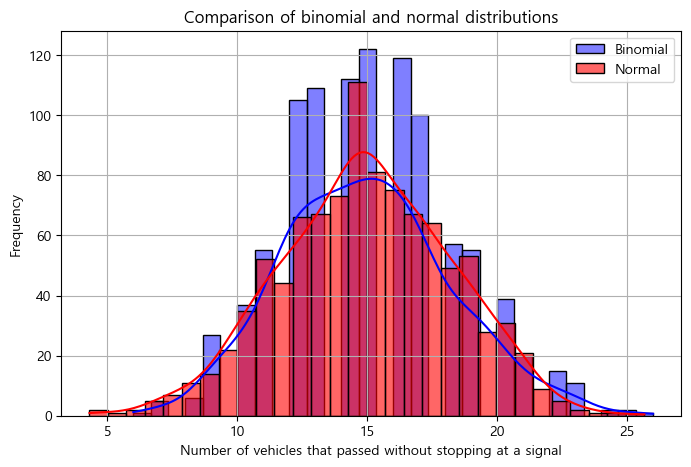

In [19]:
p = 0.3          # 차량이 신호에 멈추지 않고 지나갈 확률
n = 50           # 하루 동안의 차량 수(가정)
num_trials = 1000  # 반복 샘플링 횟수

# 정규분포 근사를 위한 평균과 표준편차 계산
mu = n * p  # [빈칸] 기대값(mean) 계산 코드 작성
sigma = np.sqrt(n * p * (1 - p))  # [빈칸] 표준편차(std) 계산 코드 작성

# 정규분포 생성
normal_samples = np.random.normal(mu, sigma, num_trials)  # [빈칸] 정규분포 샘플 생성 코드 작성

# 이항분포와 정규분포 비교
plt.figure(figsize=(8, 5))
sns.histplot(binomial_samples, bins=30, kde=True, color='blue', label='Binomial')  # [빈칸] 이항분포 시각화 코드 작성
sns.histplot(normal_samples, bins=30, kde=True, color='red', label='Normal', alpha=0.6)  # [빈칸] 정규분포 시각화 코드 작성
plt.title('Comparison of binomial and normal distributions')
plt.xlabel('Number of vehicles that passed without stopping at a signal')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## ws_10_3
### 포아송 분포(Poisson distribution)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 포아송분포 데이터 불러오기
df = pd.read_csv('data/data_ws4_3.csv')

poisson_samples = df['poisson_samples']
poisson_samples

0      10
1      19
2      16
3      19
4      17
       ..
995    20
996    15
997     9
998    21
999    22
Name: poisson_samples, Length: 1000, dtype: int64

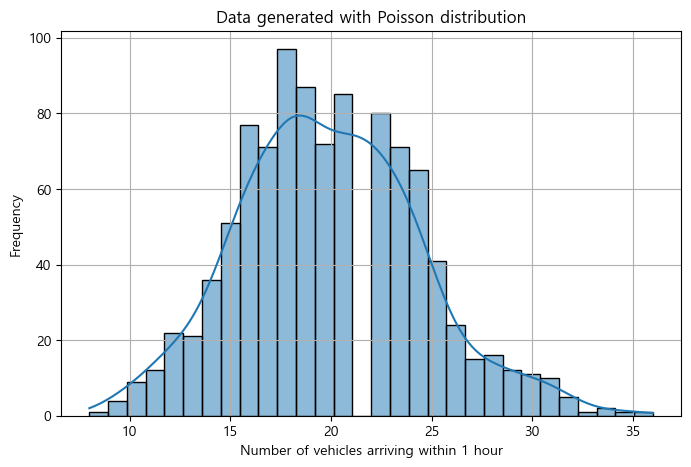

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(poisson_samples, bins=30, kde=True, edgecolor='black')  # [빈칸] 포아송분포 히스토그램 시각화 코드 작성
plt.title('Data generated with Poisson distribution')
plt.xlabel('Number of vehicles arriving within 1 hour')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

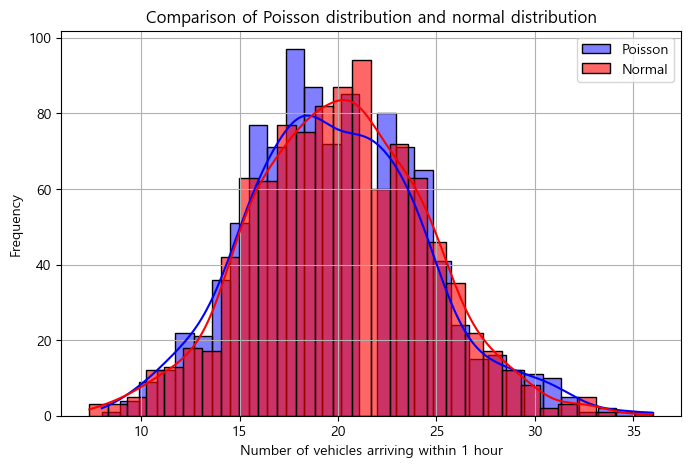

In [23]:
# 정규분포 근사를 위한 평균과 표준편차 계산
# 포아송 분포의 λ (평균)
lam = 20
num_samples = 1000

# 기대값 = λ / 표준편차 = √λ
mu = lam  # [빈칸] 기대값(mean) 계산 코드 작성
sigma = np.sqrt(lam)  # [빈칸] 표준편차(std) 계산 코드 작성

# 정규분포 생성
normal_samples = np.random.normal(mu, sigma, num_samples)  # [빈칸] 정규분포 샘플 생성 코드 작성

# 포아송분포와 정규분포 비교
plt.figure(figsize=(8, 5))
sns.histplot(poisson_samples, bins=30, kde=True, color='blue', label='Poisson')  # [빈칸] 포아송분포 시각화 코드 작성
sns.histplot(normal_samples, bins=30, kde=True, color='red', label='Normal', alpha=0.6)  # [빈칸] 정규분포 시각화 코드 작성
plt.title('Comparison of Poisson distribution and normal distribution')
plt.xlabel('Number of vehicles arriving within 1 hour')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## ws_10_4
### 코시 분포(Cauchy distribution)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data_ws4_4.csv')

# "cauchy_samples" 열만 추출해 Series로 만듦
cauchy_samples = df['cauchy_samples']
cauchy_samples

0     -0.604139
1     -0.521440
2     -0.079583
3      1.913960
4     -0.197612
         ...   
929   -0.056558
930    1.438285
931    0.204833
932    2.075192
933   -0.585849
Name: cauchy_samples, Length: 934, dtype: float64

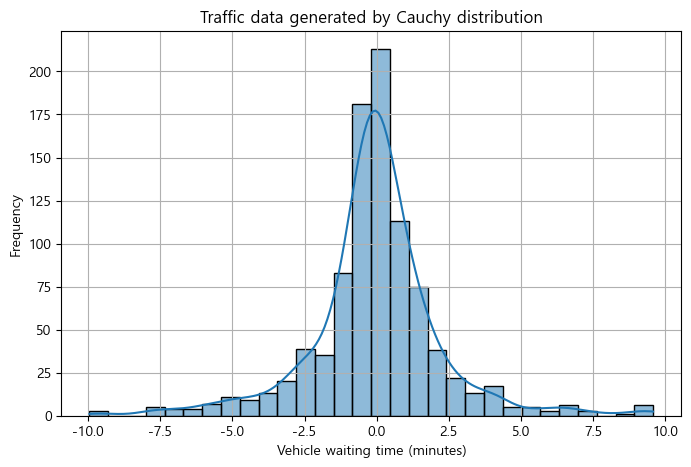

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(cauchy_samples, bins=30, kde=True, edgecolor='black')  # [빈칸] 히스토그램 시각화 코드 작성
plt.title('Traffic data generated by Cauchy distribution')
plt.xlabel('Vehicle waiting time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

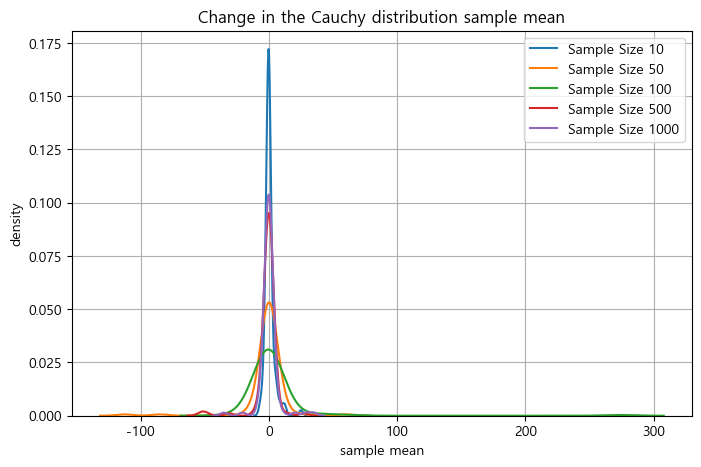

In [28]:
sample_sizes = [10, 50, 100, 500, 1000]
sample_means = []
np.random.seed(42)
for size in sample_sizes:
    means = [np.mean(np.random.standard_cauchy(size=size)) for _ in range(100)]  # [빈칸] 샘플 평균 계산 코드 작성
    sample_means.append(means)

# 각 샘플 크기에 대한 평균값 시각화
plt.figure(figsize=(8, 5))
for i, size in enumerate(sample_sizes):
    sns.kdeplot(sample_means[i], label=f'Sample Size {size}')

plt.title('Change in the Cauchy distribution sample mean')
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()


### ✅ 코시 분포를 시각화하고 공부하는 이유           
1. "중심극한정리는 언제나 통하지 않는다"는 반례         
2. 이상치(outlier)에 민감한 상황을 실험해보기 위해          
3. 현실에서도 드물게 나타나는 상황을 모델링할 때         
         
=> 즉, 이상치가 많아 정규분포 모델이 이상할 때, 코시 분포를 활용          

## ws_10_5
### 혼합 정규분포(mixture of Gaussians)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data_ws4_5.csv')

morning_speed = df['morning_speed']
night_speed = df['night_speed']

# 두 분포를 합침
mixed_speeds = np.hstack([morning_speed, night_speed])
print(f'mixed_speeds의 개수: {len(mixed_speeds)}')
mixed_speeds

mixed_speeds의 개수: 1000


array([42.25447173, 36.41574127, 41.79315981, 42.2428434 , 42.09266318,
       36.53455492, 39.81294591, 38.57765462, 50.48031439, 45.81864699,
       29.99702441, 41.92352533, 36.54512094, 40.37372974, 43.79368274,
       49.70918099, 38.06376513, 41.27978906, 38.57650974, 43.01031641,
       44.33676438, 40.28498798, 43.67460127, 35.34563391, 37.74117443,
       35.2281659 , 41.08603001, 34.7721428 , 35.84138578, 40.01726617,
       52.94957585, 38.51193949, 44.55240174, 37.30466276, 43.82212709,
       48.81037845, 45.17213635, 39.75606354, 40.59729152, 36.28282374,
       38.65624416, 31.25140326, 38.2797874 , 46.9304109 , 39.11868534,
       36.92459391, 38.40377915, 30.89425365, 37.63519989, 40.70169241,
       31.42913936, 44.86861399, 39.45878286, 39.20125386, 40.58368809,
       36.60657083, 40.07543447, 45.29844404, 38.27641938, 29.44304745,
       41.74366767, 43.45840076, 34.77742075, 36.137245  , 39.96694024,
       31.60679575, 37.4750536 , 42.18634605, 48.05539138, 37.54

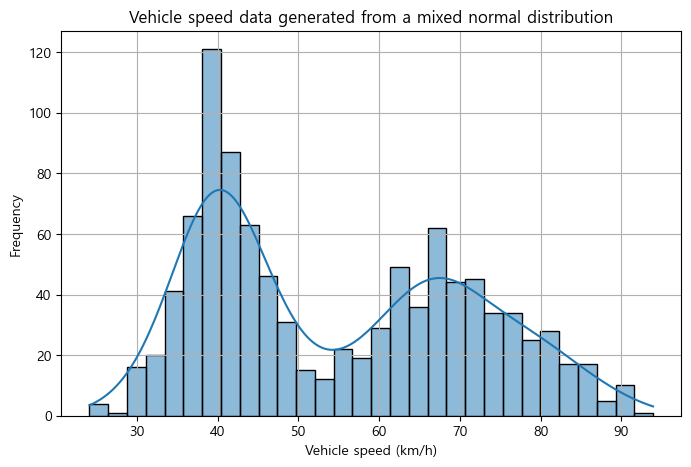

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(mixed_speeds, bins=30, kde=True, edgecolor='black')  # [빈칸] 히스토그램 시각화 코드 작성
plt.title('Vehicle speed data generated from a mixed normal distribution')
plt.xlabel('Vehicle speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

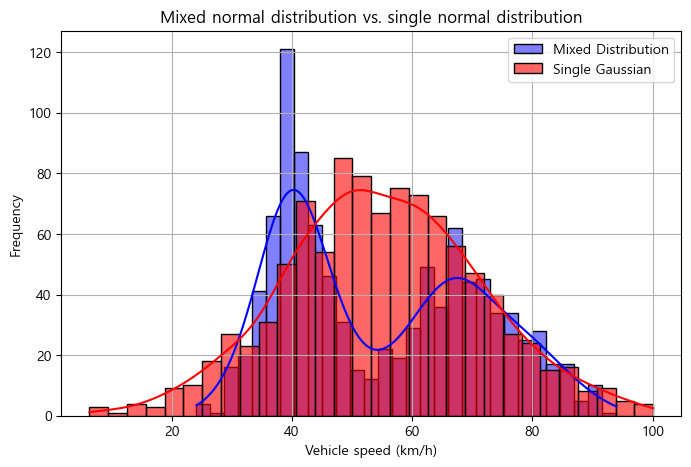

In [34]:
from scipy.stats import norm

# 단일 정규분포를 가정한 모델 (평균과 표준편차를 전체 데이터에 맞춤)
mu, sigma = mixed_speeds.mean(), mixed_speeds.std()  # [빈칸] 전체 데이터의 평균과 표준편차 계산
num_samples = 1000
single_gaussian = np.random.normal(mu, sigma, num_samples)  # [빈칸] 단일 정규분포 샘플 생성

plt.figure(figsize=(8, 5))
sns.histplot(mixed_speeds, bins=30, kde=True, color='blue', label='Mixed Distribution')  # [빈칸] 혼합 정규분포 시각화
sns.histplot(single_gaussian, bins=30, kde=True, color='red', label='Single Gaussian', alpha=0.6)  # [빈칸] 단일 정규분포 시각화
plt.title('Mixed normal distribution vs. single normal distribution')
plt.xlabel('Vehicle speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()